In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from math import log2 
import matplotlib.pyplot as plt

In [3]:
def GraphAnalysisPandas(path:str):
    A = pd.read_csv(path,delimiter='\t', header=None)
    A.rename(columns={0:'T',1: 'P', 2: 'Time'}, inplace=True)
    # pd.options.plotting.backend = "plotly"
    A.plot.scatter(x='T', y='Time')
    A.plot.scatter(x='P', y='Time')



In [39]:
def graphAnalysis(path:str, label:str = None, title:str = None, normalize:bool = False, t:int=0, op=False):
    title =  title if title != None else path.replace('.txt','').replace('_', ' ')
    A = np.loadtxt(path)
    T = np.array(A[:,0])
    P = np.array(A[:,1])
    y = np.array(A[:,2])
   
    x = None
    model = 0
    xLabel = ''
    yLabel = 'time(ns)' if not normalize else 'log2( time )'

    if(t == 1):
        x = T
        xLabel = 'T' if not op else 'log2( T )'
    elif(t == 2):
        x = P
        xLabel = 'P' if not op else 'log2( P )'
    else:
        x = T+P
        xLabel = 'T+P' if not op else 'log2( T+P )'
    if(normalize):
        aux = []
        for line in A:
            if(line[2]>0):
                aux.append([ j for j in line])
        A= aux
        T = np.array([k[0] for k in A])
        P = np.array([k[1] for k in A])
        y = np.array([k[2] for k in A])
        if(t == 1):
            x = T
        elif(t == 2):
            x = P
        else:
            x = T+P
        if(op):
            x = np.array([log2(i) for i in x])
        y = np.array([log2(i) for i in y])
        iniX = x[0]
        iniY = y[0]
        auxX = [iniX]
        auxY = [iniY]
        for i in range(len(y)):
            if(y[i] > iniY+0.5):
                auxX.append(x[i])
                auxY.append(y[i])
        x = np.array(auxX)
        y = np.array(auxY)


    model = LinearRegression().fit(x.reshape(-1,1), y)

    plt.plot(x,y, 'o', label = xLabel if label==None else label)
    signal = '+' if model.intercept_>=0 else '-'
    
    modelLabel = f"%.2f{'X'} {signal} %.2f" % (model.coef_, model.intercept_ if model.intercept_>0 else model.intercept_*-1)
    # plt.plot(x, model.intercept_+model.coef_*x,label= modelLabel)
    # px = (max(x)+min(x))/2
    # py = model.intercept_+model.coef_*px
    # plt.plot(px, py,'or', label='aa')


    plt.legend()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title, fontweight='bold')
    return model.coef_, model.intercept_
    # plt.show()


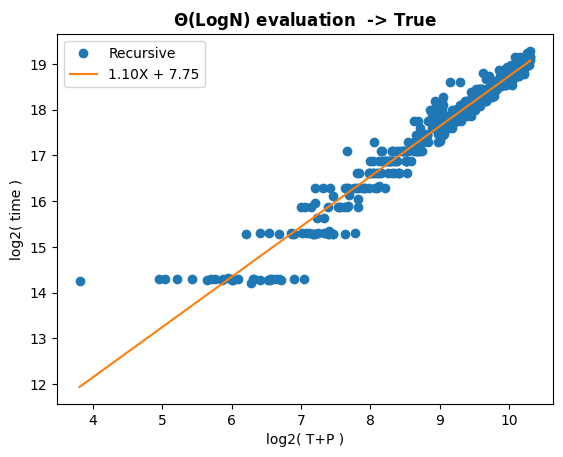

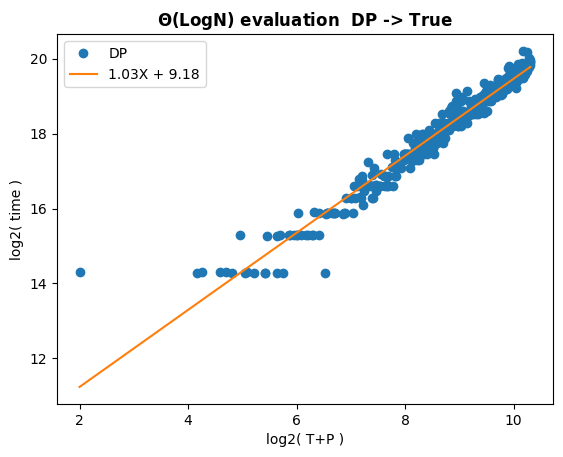

In [14]:
# True comparation
path = 'IsMatch_With_Result_True.txt'
title = r'$\mathbf{\Theta(Log N)}$ evaluation  -> True'
# graphAnalysis(path=path, title=title, t=2, label='P')
# graphAnalysis(path=path, title=title, t=1, label='T')
graphAnalysis(path=path, title=title, label='Recursive', normalize=True, op= True)

plt.show()

# True comparation
path = 'IsMatch_With_Result_True_in_DP.txt'
title = r'$\mathbf{\Theta(Log N)}$ evaluation  DP -> True'
graphAnalysis(path=path, title=title, label='DP', normalize=True, op= True)
# graphAnalysis(path=path, title=title, t=2)
# graphAnalysis(path=path, title=title, t=1)
plt.show()


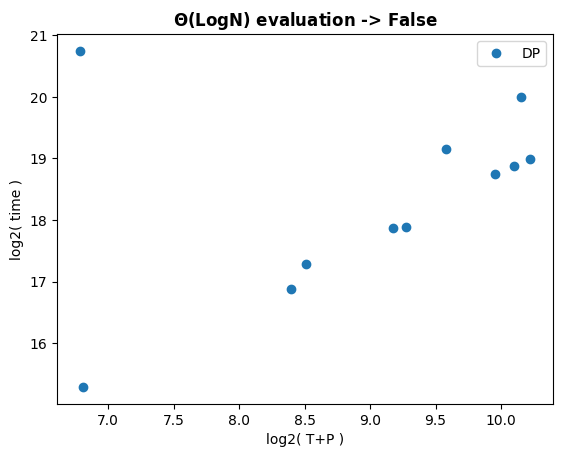

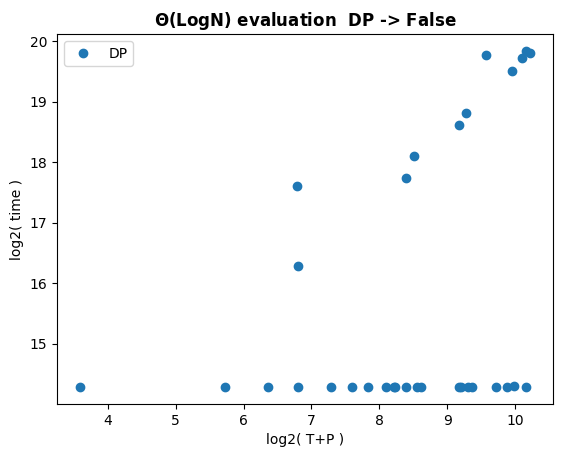

In [40]:
# False comparation
path = 'IsMatch_With_Result_False.txt'
title = r'$\mathbf{\Theta(Log N)}$ evaluation -> False'
# graphAnalysis(path=path, title=title, t=2)
# graphAnalysis(path=path, title=title, t=1)
graphAnalysis(path=path, title=title, label='DP', normalize=True, op=True)

plt.show()


# False comparation DP
path = 'IsMatch_With_Result_False_in_DP.txt'
title = r'$\mathbf{\Theta(Log N)}$ evaluation  DP -> False'
# graphAnalysis(path=path, title=title, t=2)
# graphAnalysis(path=path, title=title, t=1)
graphAnalysis(path=path, title=title, label='DP', normalize=True, op=True)

plt.show()

Text(0.5, 1.0, '$Log_2$ curve')

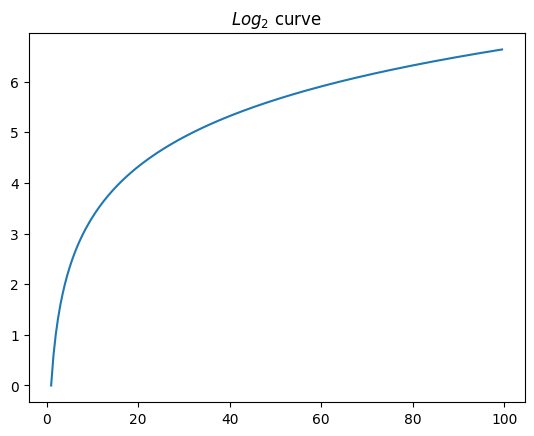

In [7]:
x = np.arange(1,100, 0.5)
y = np.log2(x)
plt.plot(x,y)
plt.title(r'$Log_2$ curve')